In [1]:
import glob

import numpy as np
import pandas as pd
import pylab as plt
from tqdm.auto import tqdm
from astropy.io import ascii

## 1. See how many spectra (%) can be opened by Astropy

In [2]:
# Read spectra metadata
spectra_info = pd.read_csv(
    "../1. download ALL wise data/wiserep_spectra_combined.csv"
)  # .set_index(' IAU name').to_dict('index')

In [3]:
spectra_info.shape

(54005, 46)

In [3]:
#Loop over all spectra ascii filenames and see how many can be opened
read_success = []
cols = []
n_cols = []
exception = []
wise_ids = []
success_count = 0
total_count = 0

for fn in tqdm(spectra_info["Ascii file"].values, desc="Reading spectra"):
    total_count += 1
    try:
        tab = ascii.read(f"../1. download ALL wise data/wiserep_data/spectra/{fn}")
        # default: guess=True
        read_success.append(True)
        cols.append(tab.colnames)
        n_cols.append(len(tab.colnames))
        exception.append(np.nan)
        success_count += 1
        # Update progress bar description with success rate
        tqdm.write(
            f"Success rate: {success_count}/{total_count} ({success_count/total_count:.2%})",
            end="\r",
        )
    except Exception as e:
        read_success.append(False)
        cols.append(np.nan)
        n_cols.append(np.nan)
        exception.append(e)

Reading spectra:   0%|          | 0/54005 [00:00<?, ?it/s]

Success rate: 22315/22765 (98.02%)

Success rate: 48312/49761 (97.09%)

Success rate: 52301/54005 (96.84%)

In [4]:
# Save opening success rates to a csv file
results_df = pd.DataFrame(
    {
        "filename": spectra_info["Ascii file"].values,
        "wise_objid": spectra_info["wise_objid"].values,
        "read_success": read_success,
        "columns": cols,
        "n_columns": n_cols,
        "exception": exception,
    }
)
# results_df.to_csv("96.84% success read - default options.csv", index=False)


# Display the first few rows of the DataFrame
results_df.head()

,filename,read_success,columns,n_columns,exception
0,1999gi_2000-03-15_00-00-00_Lick-3m_KAST_SUSPEC...,True,"[col1, col2]",2.0,NaN
1,1999gi_2000-03-15_00-00-00_Lick-3m_KAST_SUSPEC...,True,"[col1, col2]",2.0,NaN
2,SN1999gi_2000-03-15_00-00-00_Lick-3m_KAST_LOSS...,True,"[col1, col2]",2.0,NaN
3,SN_1999gi_2000-03-15_00-00-00_Lick-3m_KAST_UCB...,True,"[col1, col2]",2.0,NaN
4,1999gi_2000-03-25_00-00-00_Keck1_LRIS_SUSPECT.dat,True,"[col1, col2]",2.0,NaN


## 2. See characteristics of successfully opened spectra

In [11]:
# how many cols?
results_df["n_columns"].value_counts().sort_index()

n_columns
1.0         1
2.0     29120
3.0     16633
4.0      6037
5.0        16
6.0       137
7.0       215
8.0       140
10.0        1
11.0        1
Name: count, dtype: int64

In [12]:
# Extract file extensions from the Ascii file column
file_extensions = spectra_info["Ascii file"].str.lower().str.extract(r"\.([^.]+)$")
file_extensions.value_counts()

0         
ascii         16834
dat           10133
flm            9541
csv            5881
txt            5432
asci           5380
spec            352
clean           107
asc             102
cat              38
cal              27
ecsv             22
cal_galsub       16
text             14
xy                4
7                 3
1                 3
6                 2
5                 2
2                 2
tab               2
noheader          2
9                 1
spek              1
190_ascii         1
tx                1
mod               1
27-salt           1
324_ascii         1
4                 1
627_ascii         1
695_ascii         1
0                 1
Name: count, dtype: int64

In [13]:
# What if we limit ourselves to spectra from a single telescope (p60)?
p60df = spectra_info[spectra_info["Telescope"] == "P60"]

p60_results_df = results_df.set_index("filename").loc[
    p60df["Ascii file"].values
]

In [14]:
p60_results_df["read_success"].value_counts()

read_success
True     6274
False      30
Name: count, dtype: int64

## 3. Read and plot a single spectra

### 3.1. Handchosen spectra

In [4]:
results_df = pd.read_csv("96.84% success read - default options.csv")

In [5]:
results_df["n_columns"].value_counts().sort_index()

n_columns
1.0         1
2.0     29120
3.0     16633
4.0      6037
5.0        16
6.0       137
7.0       215
8.0       140
10.0        1
11.0        1
Name: count, dtype: int64

## Sid's notes:
1. 1 col: `SN2014L_2014-01-27_00-00-00_XLT_BFOSC_None.dat`'s 1 col has \t seperation for wavelength-flux.
2. 2 cols: wavelength, flux (units in header file)
3. 3 cols: 

In [6]:
results_df[results_df["n_columns"]==3].tail()

,wise_objid,filename,read_success,columns,n_columns,exception
53581,15026,DES17E2bhj_2017-10-23_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53587,15025,DES17C3bei_2017-11-16_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53589,15030,DES17X3dub_2017-11-16_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53591,15028,DES17X1aow_2017-11-19_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53592,15029,DES17X1axb_2017-11-19_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN


In [8]:
# SHOW FED: iloc[53581] https://www.wiserep.org/object/15026
fn = results_df.iloc[53581]["filename"]

# fn = "SN2021rcn_2021-07-08_08-21-34_Magellan-Baade_IMACS_TNS.txt"

df = ascii.read(
    f"../1. download ALL wise data/wiserep_data/spectra/{fn}"
)
df.to_pandas()

,col1,col2,col3
0,3752.499050,-198.682404,216.414429
1,3753.536701,26.505548,224.925140
2,3754.574353,202.917648,228.259811
3,3755.612004,130.071289,221.845718
4,3756.649655,-4.904921,215.443115
...,...,...,...
4925,8871.232255,74.170952,65.170082
4926,8872.269906,41.366215,44.078735
4927,8873.307557,46.970890,38.326050
4928,8874.345208,36.897865,35.209091


In [12]:
spectra_info[spectra_info["Ascii file"]==fn]

,wise_objid,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
39878,15026,NaN,DES17E2bhj,9.944611,-43.976059,SN II,0.1864,57446,2017-10-23 00:00:00.00,2458049.5,...,NaN,NaN,3752.49905,8875.382859,1.039125,de Jaeger et al. 2020,2020MNRAS.495.4860D,NaN,WIS_Bot1,2020-07-09 06:41:00


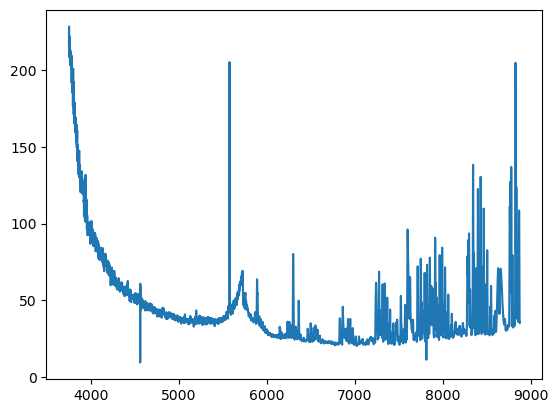

In [14]:
x = df.to_pandas().to_numpy()[:, 0]
y1 = df.to_pandas().to_numpy()[:, 1]
y2 = df.to_pandas().to_numpy()[:, 2]

plt.plot(x,y2)

### 3.2. Random spectra

In [7]:
# fn = p60df.sample(n=1)["Ascii file"].values[0]
fn = spectra_info.sample(n=1)["Ascii file"].values[0]

print(fn)
df = ascii.read(
    f"../1. download ALL wise data/wiserep_data/spectra/{fn}",
)
df.to_pandas()

2018bsz_2018-06-09_VLT-UT2_X-Shooter_Giorgos-Space.txt


,col1,col2,col3
0,3200.10,6.941340e-15,4.688250e-16
1,3200.30,6.395860e-15,4.508930e-16
2,3200.50,6.812340e-15,4.548230e-16
3,3200.70,6.510880e-15,4.482360e-16
4,3200.90,7.070210e-15,4.517840e-16
...,...,...,...
59175,24793.78,-7.430620e-17,3.589720e-17
59176,24794.38,-7.112810e-17,3.589670e-17
59177,24794.98,-7.142030e-17,3.590910e-17
59178,24795.58,-6.880240e-17,3.591600e-17


In [152]:
x = df.to_pandas().to_numpy()[:, 0]
y1 = df.to_pandas().to_numpy()[:, 1]
y2 = df.to_pandas().to_numpy()[:, 2]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [22]:
x[y1.argmax()]

np.float64(6691.8)

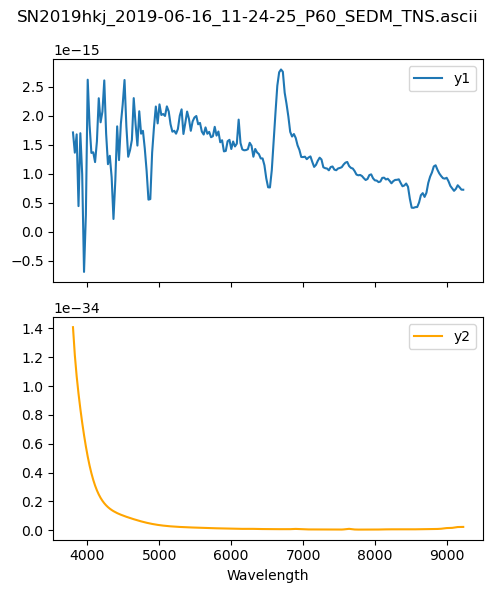

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

# Plot y1 in the first subplot
ax1.plot(x, y1, label="y1")
ax1.legend()

# Plot y2 in the second subplot
ax2.plot(x, y2, label="y2", color="orange")
ax2.set_xlabel("Wavelength")
ax2.legend()

plt.suptitle(fn)
plt.tight_layout()
plt.show()

In [211]:
spectra_info

,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,Phase (days),...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
0,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10912,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,5399.000000,0.999524,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
1,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10913,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,5100.000000,10499.000000,0.999815,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
2,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10932,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,10500.000000,1.999445,Shivvers et al. 2017,2017PASP..129e4201S,"[Data obtained from:Shivvers, I.] [Prev. spec ...",Migration From WISeREP1.0,2011-07-21 07:54:18
3,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,49488,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,10500.000000,1.999445,NaN,2002AJ....124.2490L,SNR: 22.188;,WIS_Bot1,2019-01-23 10:48:35
4,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10914,2000-03-25 00:00:00.00,2.451628e+06,NaN,...,NaN,NaN,4380.000000,6839.000000,0.999593,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54000,NaN,ZTF21aceuvhb,15.794479,3.07434,M dwarf,NaN,63947,2021-10-14 02:06:50.00,2.459502e+06,NaN,...,Free,NaN,3651.048340,9246.227457,5.512492,NaN,NaN,NaN,WIS_Bot1,2021-10-14 11:33:34
54001,NaN,ZTF22abgucbp,57.463603,-7.37529,AGN,0.382000,67804,2022-10-14 08:07:14.00,2.459867e+06,NaN,...,Free,NaN,3673.047852,9268.227452,5.512492,NaN,NaN,NaN,WIS_Bot1,2022-10-14 11:26:57
54002,NaN,ZTF20abodaps,359.810211,-17.69645,AGN,0.610000,78514,2023-10-04 06:26:57.00,2.460222e+06,NaN,...,Free,NaN,3671.381836,9267.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-10-04 13:16:26
54003,NaN,N0E8005418,315.551786,0.21671,Galaxy,0.191000,78971,2023-11-05 00:50:44.00,2.460254e+06,NaN,...,Free,NaN,3672.381836,9268.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-11-05 13:01:33


In [18]:
# ascii.read(
#     "../1. download ALL wise data/wiserep_data/spectra/ASASSN-14ad_2456700.6695_NOT_ALFOSC_None.dat",
#     guess=False,
#     fast_reader=False,
# )

InconsistentTableError: Number of header columns (7) inconsistent with data columns (8) at data line 0
Header values: ['BITPIX', '=', '8', '/', '8-bit', 'ASCII', 'characters']
Data values: ['NAXIS', '=', '1', '/', 'Number', 'of', 'Image', 'Dimensions']